In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the curre

Veri setini https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database adresinden aldım.
Bu veri seti, 73.516 kullanıcı tarafından 12.294 farklı animeye verilen derecelendirme ve tercih verilerini içermektedir. Her kullanıcı izlediği animeleri tamamladığında, animeye puan vererek değerlendirme yapabilmektedir. Veri seti, bu kullanıcı puanlamalarının derlenmiş halidir ve her anime için benzersiz bir kimlik numarası (anime_id), adı, türü (genre), formatı (TV, film, OVA vb.), bölüm sayısı, kullanıcıların ortalama puanı ve animeyi izleyen topluluk üyelerinin sayısı gibi bilgileri içerir. Bu veri seti, anime izleme eğilimleri ve popülerlik hakkında analiz yapmayı sağlar.

In [17]:
# Verileri birleştirme
anime_df = pd.read_csv('anime.csv')
rating_df = pd.read_csv('rating.csv')

merged_df = pd.merge(anime_df, rating_df, on='anime_id')

df = merged_df.groupby(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating_x', 'members']).agg({'rating_y': 'mean'}).reset_index()
df


,anime_id,name,genre,type,episodes,rating_x,members,rating_y
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,7.558514
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636,6.890284
2,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069,6.980590
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,7.36,64905,6.040320
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848,5.113801
...,...,...,...,...,...,...,...,...
11157,34367,Long Riders Recap,"Comedy, Shounen, Slice of Life, Sports",Special,1,5.97,582,4.000000
11158,34412,Hashiri Hajimeta bakari no Kimi ni,Music,Music,1,6.76,239,-1.000000
11159,34475,Monster Strike: Rain of Memories,"Action, Fantasy, Game",ONA,1,6.58,313,4.750000
11160,34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51,-1.000000


Keşifsel Veri Analizi ( EDA)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11162 non-null  int64  
 1   name      11162 non-null  object 
 2   genre     11162 non-null  object 
 3   type      11162 non-null  object 
 4   episodes  11162 non-null  object 
 5   rating_x  11162 non-null  float64
 6   members   11162 non-null  int64  
 7   rating_y  11162 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 697.8+ KB


In [19]:
df.describe()

,anime_id,rating_x,members,rating_y
count,11162.000000,11162.000000,1.116200e+04,11162.000000
mean,12320.971690,6.519057,1.943079e+04,3.958312
std,10478.274998,0.988063,5.679366e+04,2.218165
min,1.000000,1.670000,2.900000e+01,-1.000000
25%,3073.250000,5.950000,3.130000e+02,3.112179
50%,8962.000000,6.600000,1.825000e+03,4.577717
75%,21068.500000,7.200000,1.088350e+04,5.473340
max,34519.000000,9.500000,1.013917e+06,10.000000


In [20]:
df.head(20)

,anime_id,name,genre,type,episodes,rating_x,members,rating_y
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,7.558514
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636,6.890284
2,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069,6.980590
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,7.36,64905,6.040320
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848,5.113801
5,15,Eyeshield 21,"Action, Comedy, Shounen, Sports",TV,145,8.08,83648,6.680693
6,16,Hachimitsu to Clover,"Comedy, Drama, Josei, Romance",TV,24,8.18,130646,6.922879
7,17,Hungry Heart: Wild Striker,"Comedy, Shounen, Slice of Life, Sports",TV,52,7.74,13469,6.346154
8,18,Initial D Fourth Stage,"Action, Cars, Drama, Seinen, Sports",TV,24,8.24,41584,6.357405
9,19,Monster,"Drama, Horror, Mystery, Police, Psychological,...",TV,74,8.72,247562,7.809099


In [22]:
missing_data = df.isnull().sum() #Eksik veri var mı diye kontrol ediyoruz.
print(missing_data)

anime_id    0
name        0
genre       0
type        0
episodes    0
rating_x    0
members     0
rating_y    0
dtype: int64


Bu sonuçlara göre birkaç sütünda eksik veri olduğunu görüyoruz.Bunları düzeltme işlemini yapalım.

In [23]:
df['genre'].fillna(df['genre'].mode()[0], inplace=True) #genre ve type sütunları için en sık kullanılan değer ile doldurma.
df['type'].fillna(df['type'].mode()[0], inplace=True)

df['rating_x'].fillna(df['rating_x'].median(), inplace=True) #rating sütununda, eksik değerleri ortalama veya medyan değer ile doldurma.

C:\Users\ZEYNEP\AppData\Local\Temp\ipykernel_26308\47701382.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genre'].fillna(df['genre'].mode()[0], inplace=True) #genre ve type sütunları için en sık kullanılan değer ile doldurma.
C:\Users\ZEYNEP\AppData\Local\Temp\ipykernel_26308\47701382.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate

Veri setimi info,describle,head gibi metodlarla daha özetlenebilir hale getirdik. Şimdi veri setini daha iyi analiz etmek için belli ön işlem adımları uygulayalım.
1.)Animelerden konusu aksiyon olan en yüksek 15 rating'e sahip animeleri gösteren bi grafik oluşturalım.

C:\Users\ZEYNEP\AppData\Local\Temp\ipykernel_26308\579796963.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='rating_x', data=top_15_action_df, palette='Blues_d')


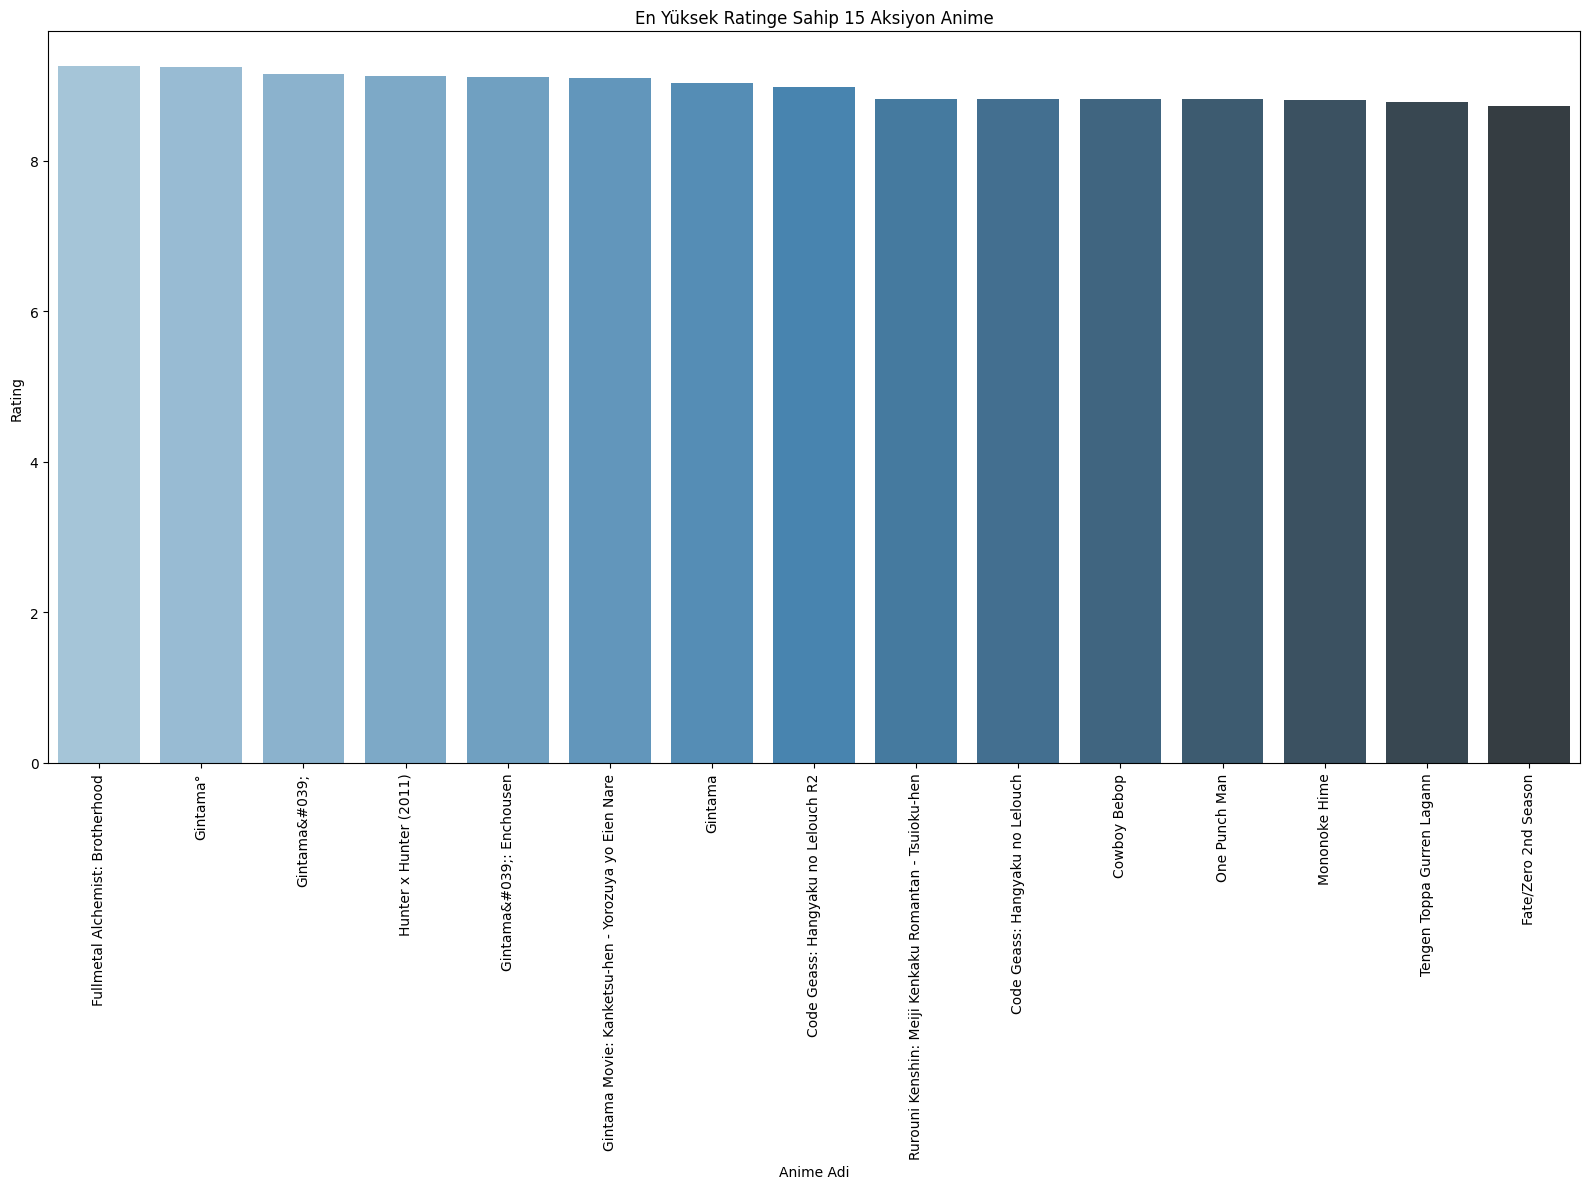

In [28]:
# Aksiyon türündeki animeleri filtreleyelim
action_df = df[df['genre'].str.contains('Action', na=False)]

# Rating'e göre en yüksek 15 animeyi seçelim
top_15_action_df = action_df.nlargest(15, 'rating_x')

# Grafik çizimi
plt.figure(figsize=(16, 12))
sns.barplot(x='name', y='rating_x', data=top_15_action_df, palette='Blues_d')
plt.xticks(rotation=90)  
plt.title('En Yüksek Ratinge Sahip 15 Aksiyon Anime')
plt.xlabel('Anime Adi')
plt.ylabel('Rating')
plt.tight_layout()  
plt.show()


2.) Rating'i en yüksek 20 animeye oy veren kişi sayısını gösteren bi pasta grafiği oluşturalım.

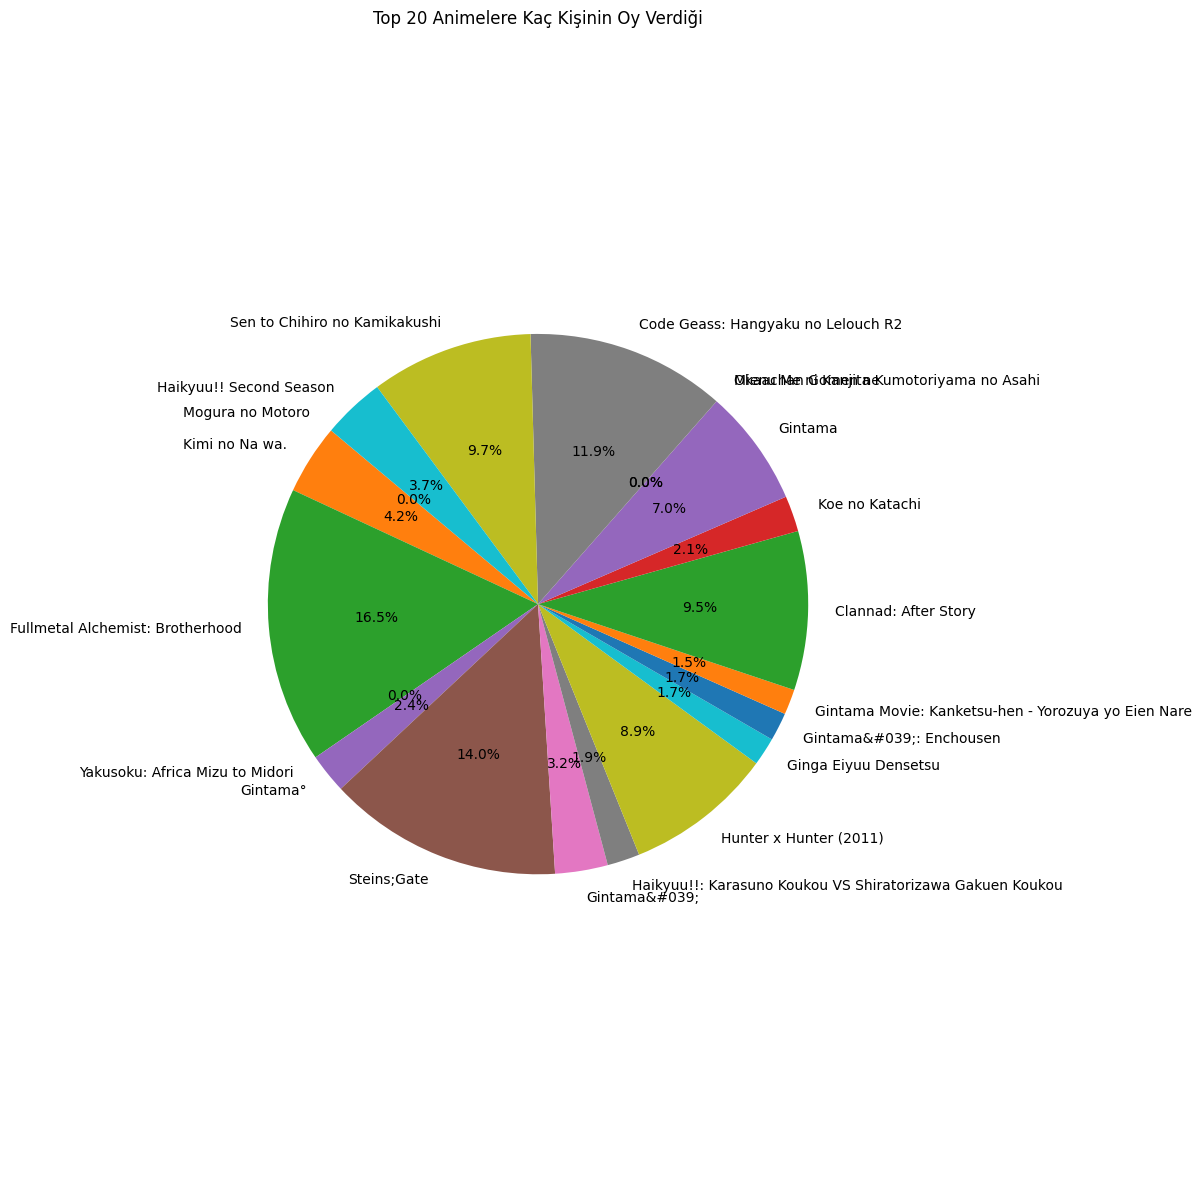

In [39]:
# En yüksek puana sahip ilk 20 animeyi seçme
top_20_anime = df.nlargest(20, 'rating_x')

# Pasta grafiği için gerekli veriler
labels = top_20_anime['name']
votes = top_20_anime['members']

# Pasta grafiği oluşturma
plt.figure(figsize=(12, 12))
plt.pie(votes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 20 Animelere Kaç Kişinin Oy Verdiği')
plt.axis('equal')  # Grafiği düzgün bir daire haline getirir
plt.tight_layout()
plt.show()

Lojistik Regrosyon kullanarak animeleri ratinglerine göre sınıflandıralım. Sınıflandırma için 3 tür grup kullandık. Rating'i 0 ile 6.5 arasında olan animeler "LOW" sütünuna 
6.5 ile 7.5 arasında olanlar "MEDİUM" sütünuna 7.5 ile 10 arasında olanlar "HİGH" sütünuna girecek şekilde bi model oluşturdum.

In [40]:
# Öncelikle rating'i belirsiz dataları belirleyelim ve onları kaldıralım.
df.replace('Unknown', pd.NA, inplace=True)
df.dropna(inplace=True)

In [42]:
# Rating 'i aralıklara bölelim ve katagorileştirelim
bins = [0, 6.5, 7.5, 10]  
labels = ['Low', 'Medium', 'High']  

df['rating_category'] = pd.cut(df['rating_x'], bins=bins, labels=labels, include_lowest=True)

print(df['rating_category'].value_counts())


rating_category
Low       5128
Medium    4425
High      1605
Name: count, dtype: int64


Çıkan sonuçları değerlendirelim: 
Low kategorisi en fazla animeye sahip. Yani veri setindeki animelerin çoğu nispeten düşük puanlar almış.
Medium kategorisi de önemli bir paya sahip, bu da puanların büyük kısmının ortalama seviyede yoğunlaştığını gösteriyor.
High kategorisi ise en az animeyi içeriyor, bu da veri setinizde yüksek puan alan anime sayısının düşük olduğunu gösteriyor.
Bu dağılım pasta grafiğini oluşturalım.

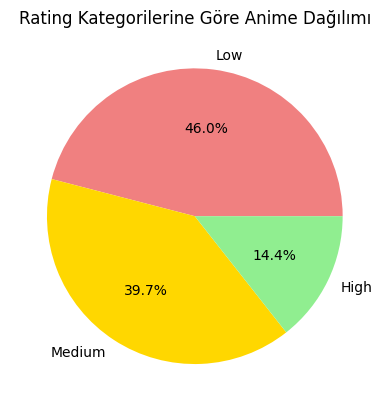

In [43]:
df['rating_category'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'gold', 'lightgreen'])
plt.title('Rating Kategorilerine Göre Anime Dağılımı')
plt.ylabel('')
plt.show()


In [44]:
# Kategorik verileri sayısal verilere dönüştürelim ve Model için kullanılacak özellikleri ve hedef değişkeni tanımlayalım
label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])
df['type_encoded'] = label_encoder.fit_transform(df['type'])

X = df[['genre_encoded', 'episodes', 'members', 'type_encoded']]
y = df['rating_category']



In [50]:
#Veriyi modelin eğitim ve test aşamaları için bölelim 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
# Lojistik Regresyon modelini oluşturalım
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)

# Test verisi ile tahmin yapalım
y_pred = logreg.predict(X_test)

# Sonuçları değerlendirme
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.71      0.31      0.43       501
         Low       0.67      0.90      0.77      1558
      Medium       0.58      0.46      0.52      1289

    accuracy                           0.64      3348
   macro avg       0.65      0.56      0.57      3348
weighted avg       0.64      0.64      0.62      3348

[[ 154   70  277]
 [   5 1407  146]
 [  59  634  596]]


c:\Users\ZEYNEP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Çıkan sonuçları inceleyelim:

1. classification_report Analizi:

High:
Precision: 0.71 (Yüksek dereceli tahminlerinizin %71'i doğru. Ancak, tahminlerinizin %29'u yanlış olabilir.)
Recall: 0.31 (Gerçek yüksek dereceli animelerin %31'i doğru tahmin ediliyor. Yani, yüksek dereceli animelerin %69'u kaçırılıyor.)
F1-score: 0.43 (Precision ve recall'ün dengeli bir ortalaması. Bu sınıf için performans hala düşük, ama önceki sonuçlardan biraz iyileşme var.)

Low:
Precision: 0.67 (Düşük dereceli tahminlerinizin %67'si doğru.)
Recall: 0.90 (Gerçek düşük dereceli animelerin %90'ı doğru tahmin ediliyor. Bu, düşük dereceli animelerin çoğunu doğru tahmin edebildiğinizi gösterir.)
F1-score: 0.77 (Düşük dereceli animeler için dengeli bir performans.)

Medium:
Precision: 0.58 (Orta dereceli tahminlerinizin %58'i doğru.)
Recall: 0.46 (Gerçek orta dereceli animelerin %46'sı doğru tahmin ediliyor.)
F1-score: 0.52 (Orta dereceli animeler için dengeli bir performans)
Accuracy: 0.64 (Genel doğru tahmin oranı %64. )

2. confusion_matrix Analizi:

İlk Satır: Gerçek High kategorisindeki animeler için tahminler:
154 doğru yüksek dereceli tahmin
70 yanlış düşük dereceli tahmin
277 yanlış orta dereceli tahmin

İkinci Satır: Gerçek Low kategorisindeki animeler için tahminler:
1407 doğru düşük dereceli tahmin
5 yanlış yüksek dereceli tahmin
146 yanlış orta dereceli tahmin

Üçüncü Satır: Gerçek Medium kategorisindeki animeler için tahminler:
596 doğru orta dereceli tahmin
59 yanlış yüksek dereceli tahmin
634 yanlış düşük dereceli tahmin

K-Means kümeleme algoritması ile veri setini genre_encoded , episodes , members , type_encoded'i guruplara ayıralım.Her küme, seçilen özellikler açısından benzer anime'leri içerir. Örneğin, çok sayıda bölüme sahip, popüler türdeki anime'ler bir kümede toplanabilirken, daha az popüler veya farklı türdeki anime'ler başka bir kümede yer alabilir.

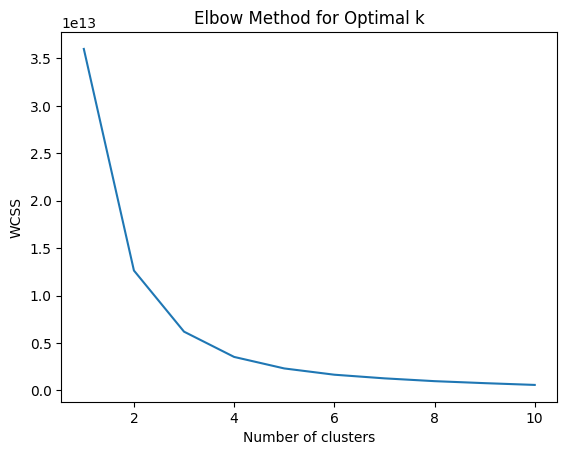

In [58]:
from sklearn.cluster import KMeans

features = df[['genre_encoded', 'episodes', 'members', 'type_encoded']]
# Çeşitli küme sayılarındaki performansını değerlendirip her k değeri için WCSS değerlerini kullanarak en uygun küme sayısını belirleyelim.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [62]:
# Belirlenen k değeri için 
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(features)

df['cluster'] = clusters

# Kümeleme sonuçlarını kontrol edelim.
print(df.head())


   anime_id                             name  \
0         1                     Cowboy Bebop   
1         5  Cowboy Bebop: Tengoku no Tobira   
2         6                           Trigun   
3         7               Witch Hunter Robin   
4         8           Beet the Vandel Buster   

                                               genre   type episodes  \
0    Action, Adventure, Comedy, Drama, Sci-Fi, Space     TV       26   
1              Action, Drama, Mystery, Sci-Fi, Space  Movie        1   
2                             Action, Comedy, Sci-Fi     TV       26   
3  Action, Drama, Magic, Mystery, Police, Superna...     TV       26   
4          Adventure, Fantasy, Shounen, Supernatural     TV       52   

   rating_x  members  rating_y  genre_encoded  type_encoded rating_category  \
0      8.82   486824  7.558514             32             5            High   
1      8.40   137636  6.890284            784             0            High   
2      8.32   283069  6.980590           

Veri kümenizdeki her bir anime örneğinin üç boyutlu bir uzayda nasıl dağıldığını ve kümelendiğini görselleştirelim. Özellikle kümelerin nasıl ayrıldığını ve veri noktalarının bu kümeler içindeki konumlarını anlamaya çalışalım.

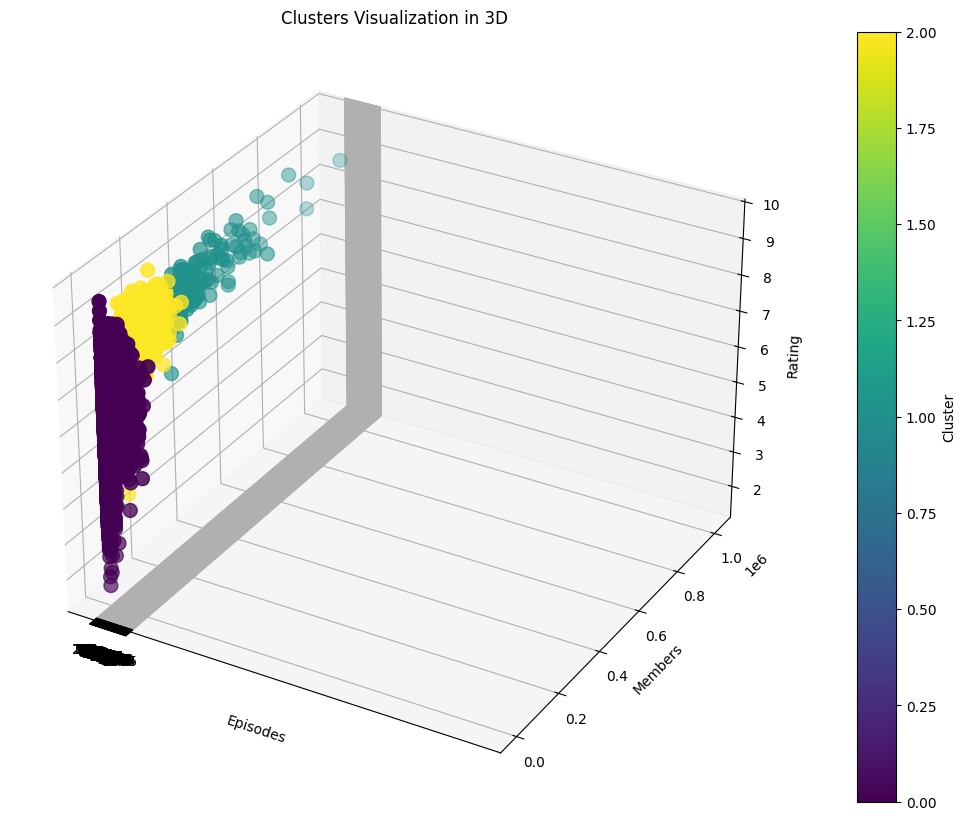

In [66]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

x = df['episodes']
y = df['members']
z = df['rating_x']  

# 3D scatter plot
scatter = ax.scatter(x, y, z, c=df['cluster'], cmap='viridis', s=100)

# Başlık ve eksen etiketlerini ekleme
ax.set_title('Clusters Visualization in 3D')
ax.set_xlabel('Episodes')
ax.set_ylabel('Members')
ax.set_zlabel('Rating')  

# Renk barı ekleme
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster')

plt.show()


Lojistik Regresyon  için çapraz doğrulama yapalım.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=500)

# Çapraz doğrulama işlemi
cv_scores = cross_val_score(model, X, y, cv=5)  

print("Çapraz Doğrulama Skorları: ", cv_scores)
print("Ortalama Skor: ", np.mean(cv_scores))
print("Standart Sapma: ", np.std(cv_scores))


c:\Users\ZEYNEP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ZEYNEP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Çapraz Doğrulama Skorları:  [0.69892473 0.59498208 0.62320789 0.64948454 0.60600628]
Ortalama Skor:  0.634521101327177
Standart Sapma:  0.03708409465408171


c:\Users\ZEYNEP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Çıkan sonucu değerlendirelim:
     Genel Performans: Ortalama skor (%63) modelimiz genel performansının yeterli olduğunu ve modelinizin genellikle iyi çalıştığını gösterir. Standart sapmanın düşük olması, modelimizin çeşitli veri alt kümelemelerinde tutarlı performans gösterdiğini belirtir.
     Standart sapma, doğruluk skorlarının ne kadar değiştiğini gösterir. Burada 0.0371 olarak hesaplanmıştır. Bu düşük standart sapma, modelinizin çapraz doğrulama sırasında performansının tutarlı olduğunu gösterir.

K-Means gibi kümeleme algoritmalarında çapraz doğrulama doğrudan uygulanmaz çünkü bu algoritmalar denetimsizdir ve genellikle etiketlenmiş verilerle test edilemezler. Ancak, bazı yöntemlerle kümeleme kalitesini değerlendirebilir ben o yöntemlerden Silhouette Skorunu kullancağım.

In [33]:
from sklearn.metrics import silhouette_score

# K-Means modelini oluşturma ve eğitme
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)

# Silhouette skoru hesaplama
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Skoru: ", score)


Silhouette Skoru:  0.8692675058248901


Çıkan sonucu değerlendirelim:

    Yüksek Skor: Skor 0.8693, kümelerinizin oldukça iyi bir şekilde ayrıldığını ve kümeler içindeki benzerliklerin yüksek, kümeler arasındaki farkların ise belirgin olduğunu gösterir.
    Kümeleme Kalitesi: Bu skor, K-Means modelimizin oldukça başarılı bir şekilde kümelendiğini ve her bir kümenin içindeki noktaların birbirine çok benzediğini gösterir. Kümeler arasında belirgin ayrımlar var.